# Rolling Statistics / moments 

Moving average (rolling average or running average) is a calculation to analyze data points by creating series of averages of different subsets of the full data set. It is also called a moving mean<br>This is not only for mean it is also for count, sum, mean, median, correlation, variance, covariance, standard deviation, skewness, and kurtosis.<br>
It is very important for analysing timeseries data.Pandas provides many function for moving or rolling statistics.<br>
Some of the methods are:<br>
<table class="docutils" border="1">
<colgroup>
<col width="20%">
<col width="80%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Function</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">rolling_count</span></tt></td>
<td>Number of non-null observations</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">rolling_sum</span></tt></td>
<td>Sum of values</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">rolling_mean</span></tt></td>
<td>Mean of values</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">rolling_median</span></tt></td>
<td>Arithmetic median of values</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">rolling_min</span></tt></td>
<td>Minimum</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">rolling_max</span></tt></td>
<td>Maximum</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">rolling_std</span></tt></td>
<td>Unbiased standard deviation</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">rolling_var</span></tt></td>
<td>Unbiased variance</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">rolling_skew</span></tt></td>
<td>Unbiased skewness (3rd moment)</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">rolling_kurt</span></tt></td>
<td>Unbiased kurtosis (4th moment)</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">rolling_quantile</span></tt></td>
<td>Sample quantile (value at %)</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">rolling_apply</span></tt></td>
<td>Generic apply</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">rolling_cov</span></tt></td>
<td>Unbiased covariance (binary)</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">rolling_corr</span></tt></td>
<td>Correlation (binary)</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">rolling_window</span></tt></td>
<td>Moving window function</td>
</tr>
</tbody>
</table>

### rolling function is chaned for new version of pandas 
in older verison of pandas,it was pd.rollnig_mean(df,winddow)<br>
but in newer vesion it changed to pd.Series(df).rolling(window).mean()<br>
same for other....

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


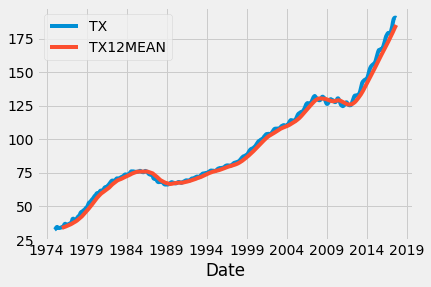

In [48]:
HPI_data = pd.read_pickle('fiddy_states_data.pickle')

HPI_data['TX12MEAN'] = pd.rolling_mean(HPI_data['TX'],12) ##moving time window is 12 months

fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
HPI_data[['TX','TX12MEAN']].plot(ax = ax1)
plt.legend()
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """Entry point for launching an IPython kernel.


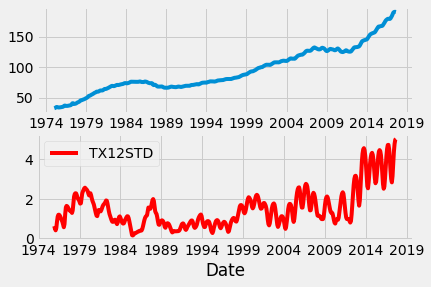

In [49]:
HPI_data['TX12STD'] = pd.rolling_std(HPI_data['TX'],12) ##moving time window is 12 months
fig = plt.figure()
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))
HPI_data['TX'].plot(ax = ax1,label='TX')
HPI_data['TX12STD'].plot(ax = ax2,label='TX12STD',color='red')
plt.legend()
plt.show()

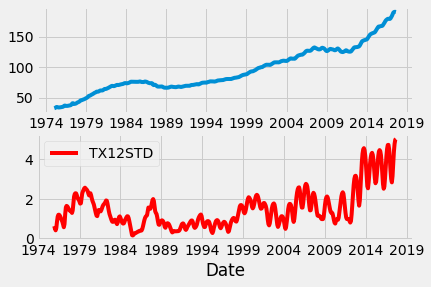

In [51]:
###error is because of Newer version don't have rolling_mean of something, these are replace by 
### pd.Series(df).rolling(window=x).mean()

HPI_data['TX12STD'] = pd.Series(HPI_data['TX']).rolling(window=12).std() ##moving time window is 12 months

fig = plt.figure()
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))
HPI_data['TX'].plot(ax = ax1,label='TX')
HPI_data['TX12STD'].plot(ax = ax2,label='TX12STD',color='red')
plt.legend()
plt.show()

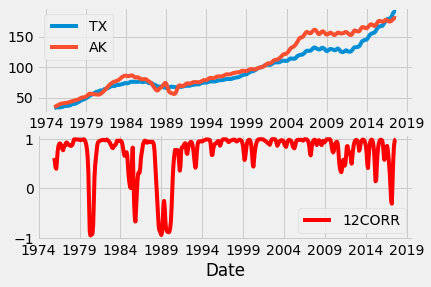

In [46]:
#HPI_data['12CORR'] = pd.rolling_corr(HPI_data['TX'],HPI_data['AK'],window=12) ##for older version

HPI_data['12CORR'] = pd.Series(HPI_data['TX']).rolling(window=12).corr(HPI_data['AK']) ##moving time window is 12 months

fig = plt.figure()
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))
HPI_data[['TX','AK']].plot(ax = ax1)
HPI_data['12CORR'].plot(ax = ax2,label='12CORR',color='red')
plt.legend()
plt.show()